In [81]:
# Bibliotecas necessárias para o código

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [82]:
df = pd.read_csv('database.csv')
df.head()

,Jogador,Time,#,Nação,Pos.,Idade,Min.,Gols,Assis.,PB,...,GCA,Cmp,Att,Cmp%,PrgP,Conduções,PrgC,Tent,Suc,Data
0,Éder,Criciúma,23,ITA,FW,37-150,57.0,0,0,0,...,0.0,12.0,16.0,"75,0",3.0,17.0,0.0,0.0,0.0,2024-04-13
1,Yannick Bolasie,Criciúma,11,COD,FW,34-325,33.0,0,0,0,...,0.0,4.0,5.0,"80,0",0.0,6.0,3.0,5.0,3.0,2024-04-13
2,Renato Kayser,Criciúma,79,BRA,FW,28-056,85.0,1,0,0,...,0.0,10.0,15.0,"66,7",4.0,14.0,0.0,1.0,0.0,2024-04-13
3,Arthur,Criciúma,35,BRA,FW,31-303,5.0,0,0,0,...,0.0,5.0,6.0,"83,3",1.0,2.0,0.0,1.0,1.0,2024-04-13
4,Marquinhos Gabriel,Criciúma,10,BRA,AM,33-267,77.0,0,0,0,...,1.0,22.0,24.0,"91,7",3.0,24.0,2.0,7.0,5.0,2024-04-13


In [83]:
# Analisar os tipos de dados
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11682 entries, 0 to 11681
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Jogador    11682 non-null  object 
 1   Time       11682 non-null  object 
 2   #          11682 non-null  int64  
 3   Nação      11676 non-null  object 
 4   Pos.       11682 non-null  object 
 5   Idade      11676 non-null  object 
 6   Min.       11681 non-null  float64
 7   Gols       11682 non-null  int64  
 8   Assis.     11682 non-null  int64  
 9   PB         11682 non-null  int64  
 10  PT         11682 non-null  int64  
 11  TC         11682 non-null  int64  
 12  CaG        11682 non-null  int64  
 13  CrtsA      11682 non-null  int64  
 14  CrtV       11682 non-null  int64  
 15  Contatos   11681 non-null  float64
 16  Div        11681 non-null  float64
 17  Crts       11682 non-null  int64  
 18  Bloqueios  11681 non-null  float64
 19  xG         11681 non-null  float64
 20  npxG  

In [84]:
# Analisar a quantidade de linhas e colunas do dataset
print(f'Total de linhas: {df.shape[0]}')
print(f'Total de colunas: {df.shape[1]}')

Total de linhas: 11682
Total de colunas: 33


In [85]:
# Analisar a presença de dados nulos
print(f'Total de dados nulos: {df.isna().sum()}')

Total de dados nulos: Jogador        0
Time           0
#              0
Nação          6
Pos.           0
Idade          6
Min.           1
Gols           0
Assis.         0
PB             0
PT             0
TC             0
CaG            0
CrtsA          0
CrtV           0
Contatos       1
Div            1
Crts           0
Bloqueios      1
xG             1
npxG           1
xAG            1
SCA            1
GCA            1
Cmp            1
Att            1
Cmp%         120
PrgP           1
Conduções      1
PrgC           1
Tent           1
Suc            1
Data           0
dtype: int64


In [86]:
# Excluir dados nulos

df = df.dropna()

In [87]:
top_goleadores = df.groupby('Jogador')['Gols'].sum().sort_values(ascending=False).head(10)



In [88]:
print(top_goleadores)

Jogador
Yuri Alberto     15
Alerrandro       15
Estevão          13
Pablo Vegetti    12
Luciano          11
Raphael Veiga    11
Pedro            11
Rodrigo Garro    10
José López       10
Hulk             10
Name: Gols, dtype: int64


In [89]:
print(type(top_goleadores))


<class 'pandas.core.series.Series'>


In [90]:
top_goleadores = top_goleadores.to_frame().reset_index()
top_goleadores.columns = ['Jogador', 'Gols']


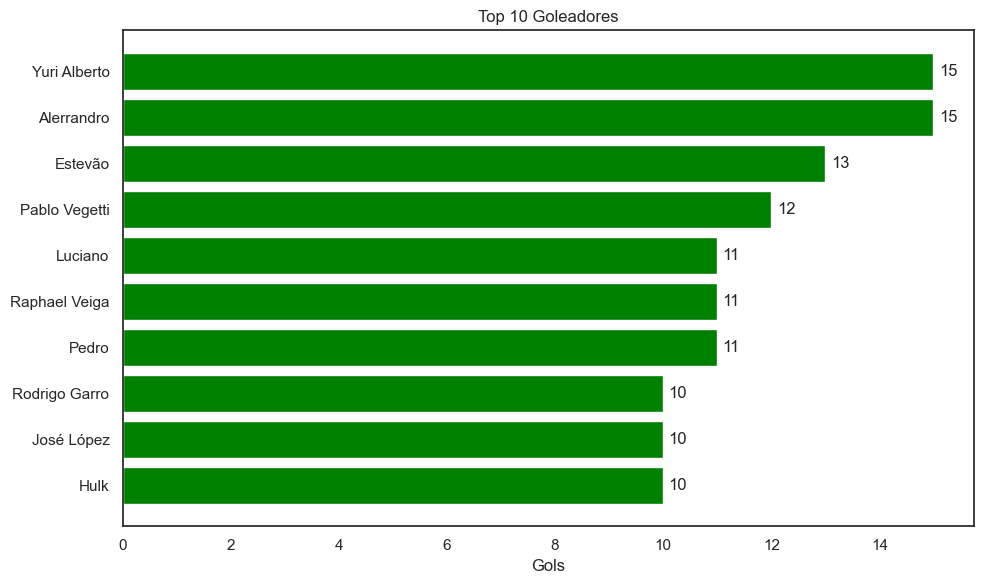

In [91]:
# Configuração do estilo do Seaborn (sem grade)
sns.set(style="white")

# Criar o gráfico de barras horizontais com uma única cor
plt.figure(figsize=(10, 6))
bars = plt.barh(top_goleadores['Jogador'], top_goleadores['Gols'], color='green')
plt.xlabel('Gols')
plt.title('Top 10 Goleadores')
plt.gca().invert_yaxis()

# Adicionando rótulos de dados
for bar in bars:
    plt.text(
        bar.get_width() + 0.1,  # Posição do rótulo (ligeiramente à direita da barra)
        bar.get_y() + bar.get_height() / 2,  # Centraliza o rótulo na altura da barra
        f'{int(bar.get_width())}',  # Texto do rótulo
        va='center',  # Alinha verticalmente no centro
        ha='left'  # Alinha horizontalmente à esquerda da barra
    )

# Ajustar layout e remover linhas de borda extras
plt.tight_layout()
plt.show()


In [92]:
top_assistencias = df.groupby('Jogador')['Assis.'].sum().sort_values(ascending=False).head(10)


In [93]:
print(top_assistencias)

Jogador
Rodrigo Garro           10
Estevão                  9
Matheus Pereira          7
Matheusinho              7
Jefferson Savarino       7
Lucas Moura              6
Gerson                   6
Tomas Pochettino         6
Ganso                    6
Cauly Oliveira Souza     6
Name: Assis., dtype: int64


In [94]:
print(type(top_assistencias))

<class 'pandas.core.series.Series'>


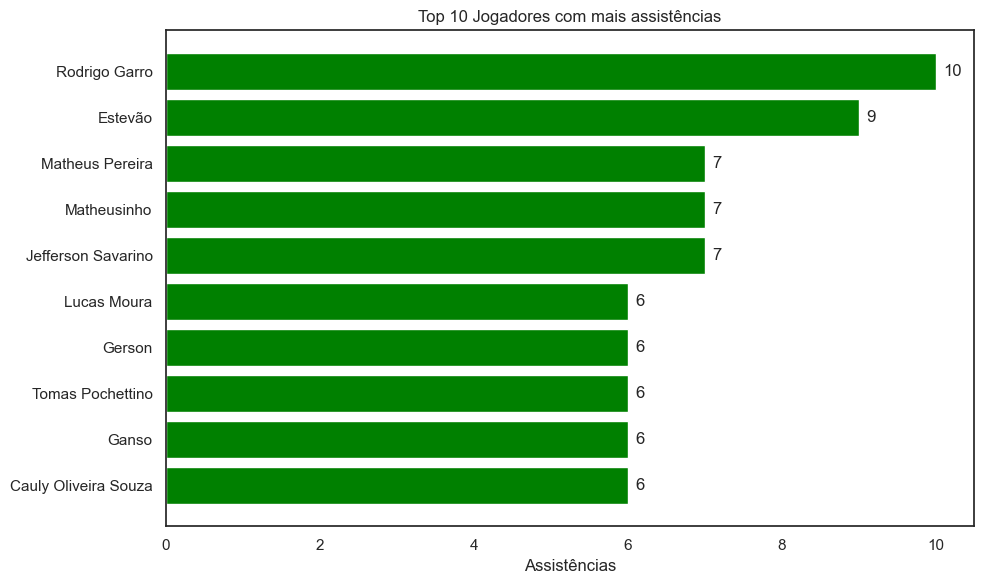

In [95]:
# Calculando a soma de assistências por jogador
top_assistencias = df.groupby('Jogador', as_index=False).agg({
    'Assis.': 'sum'
})

# Ordenando em ordem decrescente e selecionando os 10 melhores
top_assistencias = top_assistencias.sort_values(by='Assis.', ascending=False).head(10)

# Gráfico de Assistências
plt.figure(figsize=(10, 6))
bars = plt.barh(top_assistencias['Jogador'], top_assistencias['Assis.'], color='green')
plt.xlabel('Assistências')
plt.title('Top 10 Jogadores com mais assistências')
plt.gca().invert_yaxis()

# Adicionando rótulos de dados
for bar in bars:
    plt.text(
        bar.get_width() + 0.1,  # Posição do rótulo (ligeiramente à direita da barra)
        bar.get_y() + bar.get_height() / 2,  # Centraliza o rótulo na altura da barra
        f'{int(bar.get_width())}',  # Texto do rótulo
        va='center'  # Alinha verticalmente no centro
    )

plt.tight_layout()
plt.show()


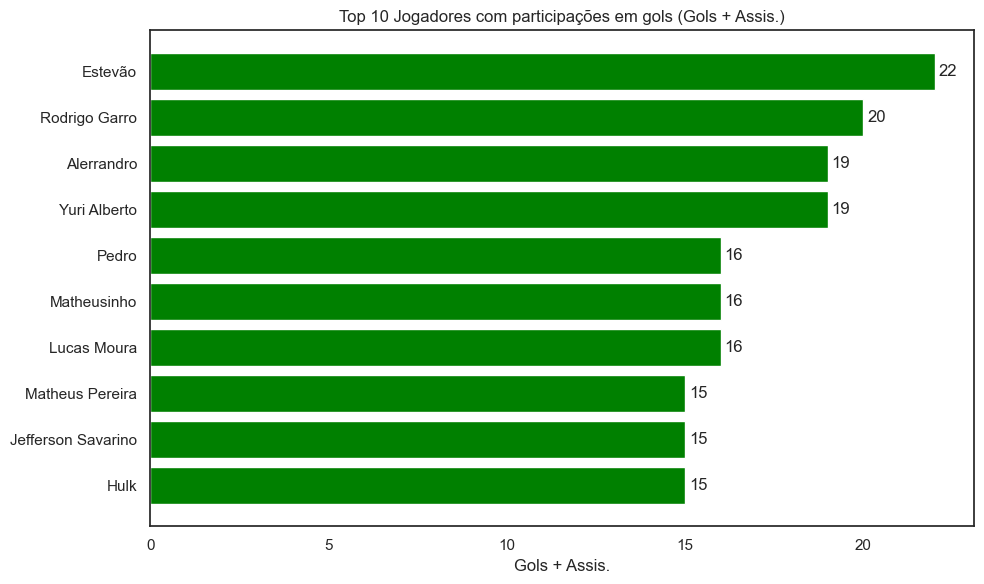

In [96]:
# Calculando a soma de gols e assistências por jogador
top_jogadores = df.groupby('Jogador', as_index=False).agg({
    'Gols': 'sum',
    'Assis.': 'sum'
})

# Somando gols e assistências
top_jogadores['Gols + Assis.'] = top_jogadores['Gols'] + top_jogadores['Assis.']

# Ordenando em ordem decrescente e selecionando os 10 melhores
top_jogadores = top_jogadores.sort_values(by='Gols + Assis.', ascending=False).head(10)

# Gráfico de Gols + Assistências
plt.figure(figsize=(10, 6))
bars = plt.barh(top_jogadores['Jogador'], top_jogadores['Gols + Assis.'], color='green')
plt.xlabel('Gols + Assis.')
plt.title('Top 10 Jogadores com participações em gols (Gols + Assis.)')
plt.gca().invert_yaxis()

# Adicionando rótulos de dados
for bar in bars:
    plt.text(
        bar.get_width() + 0.1,  # Posição do rótulo (ligeiramente à direita da barra)
        bar.get_y() + bar.get_height() / 2,  # Centraliza o rótulo na altura da barra
        f'{int(bar.get_width())}',  # Texto do rótulo
        va='center'  # Alinha verticalmente no centro
    )

plt.tight_layout()
plt.show()


In [97]:
# Criando um ID com essas colunas
df["ID_Jogador"] = df["Jogador"] + "_" + df["Time"] + "_" + df["Nação"] + "_" + df["Pos."]


In [98]:
# Verificar se o código anterior deu certo
df[["Jogador", "Time", "Nação", "Pos.", "ID_Jogador"]].head(10)


,Jogador,Time,Nação,Pos.,ID_Jogador
0,Éder,Criciúma,ITA,FW,Éder_Criciúma_ITA_FW
1,Yannick Bolasie,Criciúma,COD,FW,Yannick Bolasie_Criciúma_COD_FW
2,Renato Kayser,Criciúma,BRA,FW,Renato Kayser_Criciúma_BRA_FW
3,Arthur,Criciúma,BRA,FW,Arthur_Criciúma_BRA_FW
4,Marquinhos Gabriel,Criciúma,BRA,AM,Marquinhos Gabriel_Criciúma_BRA_AM
5,Matheusinho,Criciúma,BRA,AM,Matheusinho_Criciúma_BRA_AM
6,Higor Meritão,Criciúma,BRA,LM,Higor Meritão_Criciúma_BRA_LM
7,Barreto,Criciúma,BRA,CM,Barreto_Criciúma_BRA_CM
8,Fellipe Mateus,Criciúma,BRA,RM,Fellipe Mateus_Criciúma_BRA_RM
9,Miguel Trauco,Criciúma,PER,RM,Miguel Trauco_Criciúma_PER_RM


In [99]:
# Para remover valores duplicados
df = df.drop_duplicates(subset="ID_Jogador", keep="first")


In [100]:
# Verificar se há duplicados
df["ID_Jogador"].duplicated().sum()

np.int64(0)

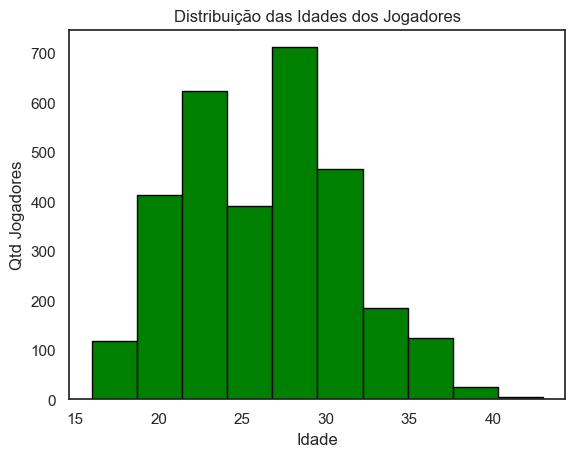

In [101]:
# Separar a coluna "Idade" para pegar apenas a parte antes do hífen
df['Idade_Anos'] = df["Idade"].str.split('-', expand=True)[0]

# Converter a coluna para numérico
df['Idade_Anos'] = pd.to_numeric(df['Idade_Anos'], errors='coerce')

# Remover linhas com valores nulos
df = df.dropna(subset=["Idade_Anos"])

# Criar o histograma com a idade verdadeira (antes do hífen)
plt.hist(df["Idade_Anos"], bins=10, edgecolor='black', color='green')
plt.title("Distribuição das Idades dos Jogadores")
plt.xlabel("Idade")
plt.ylabel("Qtd Jogadores")
plt.show()
